# LP2: Vodafone Customer Churn Prediction

## Business Understanding

### 1. Project Description/Background

> Given the large number of customers the Telecommunication industry service providers have and the competitive nature of their products/services, the rate at which customers can stop using one provider's product/service in preference for another provider is high. Moreover, the providers can't afford the time to have dedicated attention to each client so that they know when they are dissatified with their products/services and the cost of acquiring a new client as compared to maintaining an existing one is very high.
>
> Therefore, Telcos have a pressing need to use their data from customer interactions to predict with high accuracy the customers that are likely to switch from using their products/services so that they can invest in mitigation startegies to maintain those clients, thereby, increasing their market position and profits.
>
> In this project we utilize the Vodafone Corporation data and Machine Learning models to predict with high accuracy the likelihood of a customer stopping the use of its products/services. We will also identify the factors affecting customer churn and suggest strategies the Telco can deploy to retain a high percentage of its customers. 

#### 2. Features
There are 17 categorical features:

> - CustomerID: Unique identifier for each customer
> - gender: Whether the customer is a male or a female
> - SeniorCitizen: Whether the customer is a senior citizen or not (1, 0)
> - Partner: Whether the customer has a partner or not (Yes, No)
> - Dependent: Whether the customer has dependents or not (Yes, No)
> - PhoneService: Whether the customer has a phone service or not (Yes, No)
> - MultipeLines: Whether the customer has multiple lines (Yes, No, No phone service)
> - InternetService: Customer’s internet service provider (DSL, Fiber optic, No)
> - OnlineSecurity: Whether the customer has online security (Yes, No, No internet service)
> - OnlineBackup: Whether the customer has an online backup (Yes, No, No internet service)
> - DeviceProtection: Whether the customer has device protection (Yes, No, No internet service)
> - TechSupport: Whether the customer has tech support (Yes, No, No internet service)
> - StreamingTV: Whether the customer streams TV (Yes, No, No internet service)
> - StreamingMovies: Whether the customer streams movies (Yes, No, No internet service)
> - Contract: The contract term of the customer (Month-to-month, One year, Two years)
> - PaperlessBilling: Whether the customer does paperless Billing or not (True, False)
> - PaymentMethod: The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))

Next, there are 3 numerical features:

> - Tenure: Number of months the customer has stayed with the company
> - MonthlyCharges: The amount charged to the customer monthly
> - TotalCharges: The total amount charged to the customer

Finally, there’s a prediction feature:

> - Churn: Whether the customer churned or not (Yes or No)

These features can also be subdivided into:

**Demographic customer information:**
> gender , SeniorCitizen , Partner , Dependents

**Services that each customer has signed up for:**
> PhoneService , MultipleLines , InternetService , OnlineSecurity , OnlineBackup , DeviceProtection , TechSupport , StreamingTV , StreamingMovies,

**Customer account information:**
> tenure , Contract , PaperlessBilling , PaymentMethod , MonthlyCharges , TotalCharges

### 3. Hypothesis

> **Null Hypothesis:** Contract duration has no effect on the probability of customer churn.
>
> **Alternative Hypothesis:** Contract duration significantly affects the probability of customer churn.

### 4. Analytical Questions
> 1. Does the monthly and total charges affect the probability of a customer churning?
> 1. How does contract duration affect the probability of a customer churning?
> 1. How likely are customers with a tenure of more than 5 years likely to churn?
> 1. Which payment method has the customers with the highest churn rate?
> 1. Which demographic factor(s) most affects the customer churn rate?
> 1. Which customer service has the highest churn rate?

## Data Understanding

### 1. Installing Packages and Importing Modules

In [68]:
#importing modules

import pyodbc      #just installed with pip
from dotenv import dotenv_values    #import the dotenv_values function from the dotenv package
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import warnings 

warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)

# Load environment variables from .env file into a dictionary
environment_variables = dotenv_values('.env')

In [24]:
# Get the values for the credentials you set in the '.env' file
server = environment_variables.get("SERVER")
database = environment_variables.get("DATABASE")
username = environment_variables.get("USERNAME")
password = environment_variables.get("PASSWORD")
connection_string = f"DRIVER={{SQL Server}};SERVER={server};DATABASE={database};UID={username};PWD={password}"

In [25]:
# Establish a connection
connection = pyodbc.connect(connection_string)

### 2. Loading Data

In [26]:
# SQL query to fetch data from 'dbo.LP2_Telco_churn_first_3000' table
query = "Select * from dbo.LP2_Telco_churn_first_3000"

# Read data from the SQL query result
first_3000data = pd.read_sql(query, connection)
first_3000data.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,False,True,False,1,False,None,DSL,False,...,False,False,False,False,Month-to-month,True,Electronic check,29.850000,29.850000,False
1,5575-GNVDE,Male,False,False,False,34,True,False,DSL,True,...,True,False,False,False,One year,False,Mailed check,56.950001,1889.500000,False
2,3668-QPYBK,Male,False,False,False,2,True,False,DSL,True,...,False,False,False,False,Month-to-month,True,Mailed check,53.849998,108.150002,True
3,7795-CFOCW,Male,False,False,False,45,False,None,DSL,True,...,True,True,False,False,One year,False,Bank transfer (automatic),42.299999,1840.750000,False
4,9237-HQITU,Female,False,False,False,2,True,False,Fiber optic,False,...,False,False,False,False,Month-to-month,True,Electronic check,70.699997,151.649994,True


In [27]:
second_2000data = pd.read_excel('Telco-churn-second-2000.xlsx')
second_2000data.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7613-LLQFO,Male,0,No,No,12,Yes,Yes,Fiber optic,No,No,No,No,Yes,No,Month-to-month,Yes,Electronic check,84.45,1059.55
1,4568-TTZRT,Male,0,No,No,9,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.40,181.8
2,9513-DXHDA,Male,0,No,No,27,Yes,No,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,No,Electronic check,81.70,2212.55
3,2640-PMGFL,Male,0,No,Yes,27,Yes,Yes,Fiber optic,No,No,No,Yes,No,No,Month-to-month,Yes,Electronic check,79.50,2180.55
4,3801-HMYNL,Male,0,Yes,Yes,1,Yes,No,Fiber optic,No,No,No,No,Yes,Yes,Month-to-month,No,Mailed check,89.15,89.15


In [28]:
testingdata = pd.read_csv('LP2_Telco-churn-last-2000.csv')
testingdata.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5600-PDUJF,Male,0,No,No,6,Yes,No,DSL,No,...,No,Yes,No,No,Month-to-month,Yes,Credit card (automatic),49.50,312.7,No
1,8292-TYSPY,Male,0,No,No,19,Yes,No,DSL,No,...,Yes,Yes,No,No,Month-to-month,Yes,Credit card (automatic),55.00,1046.5,Yes
2,0567-XRHCU,Female,0,Yes,Yes,69,No,No phone service,DSL,Yes,...,Yes,No,No,Yes,Two year,Yes,Credit card (automatic),43.95,2960.1,No
3,1867-BDVFH,Male,0,Yes,Yes,11,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,74.35,834.2,Yes
4,2067-QYTCF,Female,0,Yes,No,64,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,111.15,6953.4,No


### 3. Exploratory Data Analysis

#### Cleaning the first dataset
>**Missing Values**

In [30]:
# Checking missing values for First dataset
first_3000data.isnull().sum()

customerID            0
gender                0
SeniorCitizen         0
Partner               0
Dependents            0
tenure                0
PhoneService          0
MultipleLines       269
InternetService       0
OnlineSecurity      651
OnlineBackup        651
DeviceProtection    651
TechSupport         651
StreamingTV         651
StreamingMovies     651
Contract              0
PaperlessBilling      0
PaymentMethod         0
MonthlyCharges        0
TotalCharges          5
Churn                 1
dtype: int64

In [31]:
# Impute missing values with mode for categorical columns
categorical_cols = ['MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']
first_3000data[categorical_cols] = first_3000data[categorical_cols].fillna(first_3000data[categorical_cols].mode().iloc[0])

# Impute missing values with mean for numeric column (TotalCharges)
first_3000data['TotalCharges'] = first_3000data['TotalCharges'].fillna(first_3000data['TotalCharges'].mean())

# Drop rows with missing values in 'Churn'
first_3000data = first_3000data.dropna(subset=['Churn'])

In [32]:
first_3000data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2999 entries, 0 to 2999
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        2999 non-null   object 
 1   gender            2999 non-null   object 
 2   SeniorCitizen     2999 non-null   bool   
 3   Partner           2999 non-null   bool   
 4   Dependents        2999 non-null   bool   
 5   tenure            2999 non-null   int64  
 6   PhoneService      2999 non-null   bool   
 7   MultipleLines     2999 non-null   bool   
 8   InternetService   2999 non-null   object 
 9   OnlineSecurity    2999 non-null   bool   
 10  OnlineBackup      2999 non-null   bool   
 11  DeviceProtection  2999 non-null   bool   
 12  TechSupport       2999 non-null   bool   
 13  StreamingTV       2999 non-null   bool   
 14  StreamingMovies   2999 non-null   bool   
 15  Contract          2999 non-null   object 
 16  PaperlessBilling  2999 non-null   bool   
 17  

> Our first dataset has all the data having delt with missing values.

**Cleaning the second dataset**

In [33]:
second_2000data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        2000 non-null   object 
 1   gender            2000 non-null   object 
 2   SeniorCitizen     2000 non-null   int64  
 3   Partner           2000 non-null   object 
 4   Dependents        2000 non-null   object 
 5   tenure            2000 non-null   int64  
 6   PhoneService      2000 non-null   object 
 7   MultipleLines     2000 non-null   object 
 8   InternetService   2000 non-null   object 
 9   OnlineSecurity    2000 non-null   object 
 10  OnlineBackup      2000 non-null   object 
 11  DeviceProtection  2000 non-null   object 
 12  TechSupport       2000 non-null   object 
 13  StreamingTV       2000 non-null   object 
 14  StreamingMovies   2000 non-null   object 
 15  Contract          2000 non-null   object 
 16  PaperlessBilling  2000 non-null   object 


> **Standardizing the Second Data Set datatypes to match with the First Data Set datatypes for easy analysis**

In [34]:
#listing the unique values for all the categorical values
unique_values = second_2000data[['OnlineSecurity', 'MultipleLines','OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']].apply(lambda x: x.unique())
unique_values 

,OnlineSecurity,MultipleLines,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,No,Yes,No,No,No,Yes,No
1,No internet service,No,No internet service,No internet service,No internet service,No internet service,No internet service
2,Yes,No phone service,Yes,Yes,Yes,No,Yes


In [35]:
# Convert 'SeniorCitizen' to bool in second dataset
second_2000data['SeniorCitizen'] = second_2000data['SeniorCitizen'].astype(bool)

In [36]:
# Convert columns to bool in second dataset
bool_columns = ['Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling']
second_2000data[bool_columns] = second_2000data[bool_columns].replace({'Yes': True, 'No': False})

# Replace unexpected values with 'No' in specified columns
unexpected_values = ['No phone service', 'No internet service']  
specified_columns = ['OnlineSecurity','OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

for column in specified_columns:
    second_2000data[column].replace(unexpected_values, False, inplace=True)

In [37]:
# Convert columns to bool in second dataset
bool_columns = ['Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling']
second_2000data[bool_columns] = second_2000data[bool_columns].replace({'Yes': True, 'No': False})

# Replace unexpected values with 'No' in specified columns
unexpected_values = ['No phone service', 'No internet service']  
specified_columns = ['OnlineSecurity','OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

for column in specified_columns:
    second_2000data[column].replace(unexpected_values, False, inplace=True)

# Convert 'MultipleLines' column to bool
second_2000data['MultipleLines'] = second_2000data['MultipleLines'].replace({'Yes': True, 'No': False, 'No phone service': False})


In [38]:
# Convert 'TotalCharges' to numeric in data_2000
second_2000data['TotalCharges'] = pd.to_numeric(second_2000data['TotalCharges'], errors='coerce')

In [39]:
second_2000data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        2000 non-null   object 
 1   gender            2000 non-null   object 
 2   SeniorCitizen     2000 non-null   bool   
 3   Partner           2000 non-null   bool   
 4   Dependents        2000 non-null   bool   
 5   tenure            2000 non-null   int64  
 6   PhoneService      2000 non-null   bool   
 7   MultipleLines     2000 non-null   bool   
 8   InternetService   2000 non-null   object 
 9   OnlineSecurity    2000 non-null   bool   
 10  OnlineBackup      2000 non-null   bool   
 11  DeviceProtection  2000 non-null   bool   
 12  TechSupport       2000 non-null   bool   
 13  StreamingTV       2000 non-null   bool   
 14  StreamingMovies   2000 non-null   bool   
 15  Contract          2000 non-null   object 
 16  PaperlessBilling  2000 non-null   bool   


> Havind delt with the datatypes in the second dataset such that its columns are well alligned with the first dataset, we can now combine the two datasets.

In [40]:
# Concatenate the first and second dataset
combined_data = pd.concat([first_3000data, second_2000data], ignore_index=True)

# Verify the structure of the combined dataset
combined_data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

**Performing EDA for Concatenated Dataset**

In [41]:
combined_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4999 entries, 0 to 4998
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        4999 non-null   object 
 1   gender            4999 non-null   object 
 2   SeniorCitizen     4999 non-null   bool   
 3   Partner           4999 non-null   bool   
 4   Dependents        4999 non-null   bool   
 5   tenure            4999 non-null   int64  
 6   PhoneService      4999 non-null   bool   
 7   MultipleLines     4999 non-null   bool   
 8   InternetService   4999 non-null   object 
 9   OnlineSecurity    4999 non-null   bool   
 10  OnlineBackup      4999 non-null   bool   
 11  DeviceProtection  4999 non-null   bool   
 12  TechSupport       4999 non-null   bool   
 13  StreamingTV       4999 non-null   bool   
 14  StreamingMovies   4999 non-null   bool   
 15  Contract          4999 non-null   object 
 16  PaperlessBilling  4999 non-null   bool   


In [42]:
#Check for null values
combined_data.isnull().sum()

customerID             0
gender                 0
SeniorCitizen          0
Partner                0
Dependents             0
tenure                 0
PhoneService           0
MultipleLines          0
InternetService        0
OnlineSecurity         0
OnlineBackup           0
DeviceProtection       0
TechSupport            0
StreamingTV            0
StreamingMovies        0
Contract               0
PaperlessBilling       0
PaymentMethod          0
MonthlyCharges         0
TotalCharges           3
Churn               2000
dtype: int64

> The second dataset did not have the churn column data hence the 2000 missing values.

**Handling Missing Values in Churn and TotalCharge columns**

In [43]:
# Convert 'Churn' to boolean data type
combined_data['Churn'] = combined_data['Churn'].astype('bool')

# Fill missing values in 'Churn' with the mode
combined_data['Churn'].fillna(combined_data['Churn'].mode()[0], inplace=True)

# Drop rows with missing values in 'TotalCharges'
combined_data.dropna(subset=['TotalCharges'], inplace=True)

# Verify no more missing values
combined_data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [44]:
# Check for duplicated rows
combined_data.duplicated().sum()

0

In [45]:
# Display summary statistics
combined_data.describe()

,tenure,MonthlyCharges,TotalCharges
count,4996.000000,4996.000000,4996.000000
mean,32.269015,64.798639,2274.066632
std,24.626241,30.128771,2266.625014
min,0.000000,18.250000,18.799999
25%,9.000000,35.500000,388.425005
50%,29.000000,70.400002,1398.424988
75%,55.250000,89.949997,3755.062573
max,72.000000,118.750000,8684.800000


**Univariate, Bi-variate, Multi-variate Analysis**

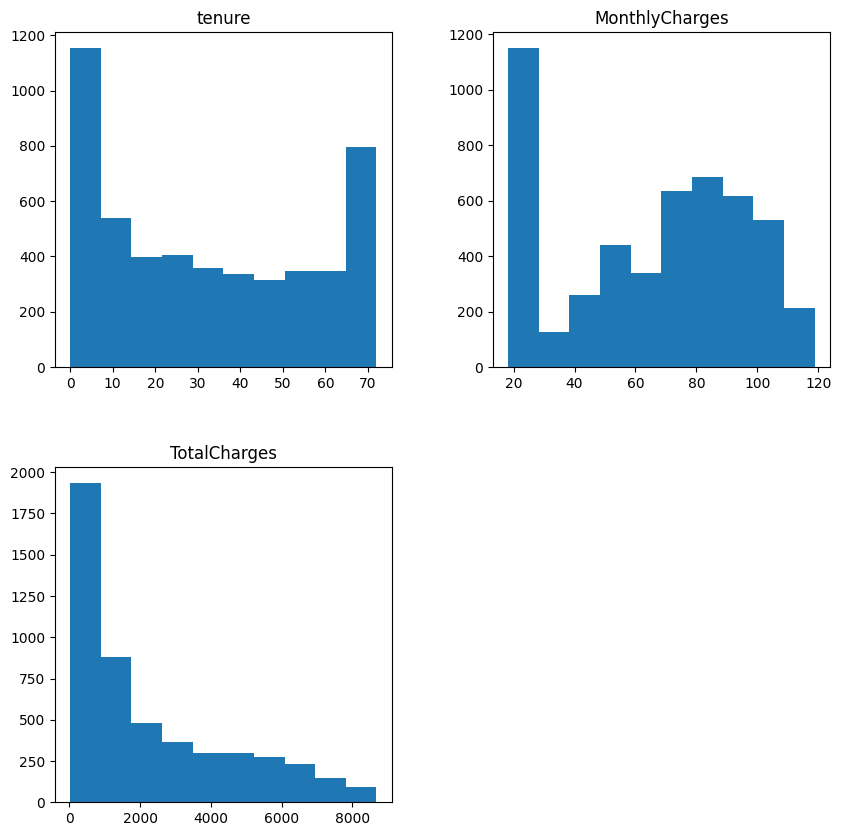

In [58]:
combined_data.hist(figsize=(10,10), grid= False)
plt.show()

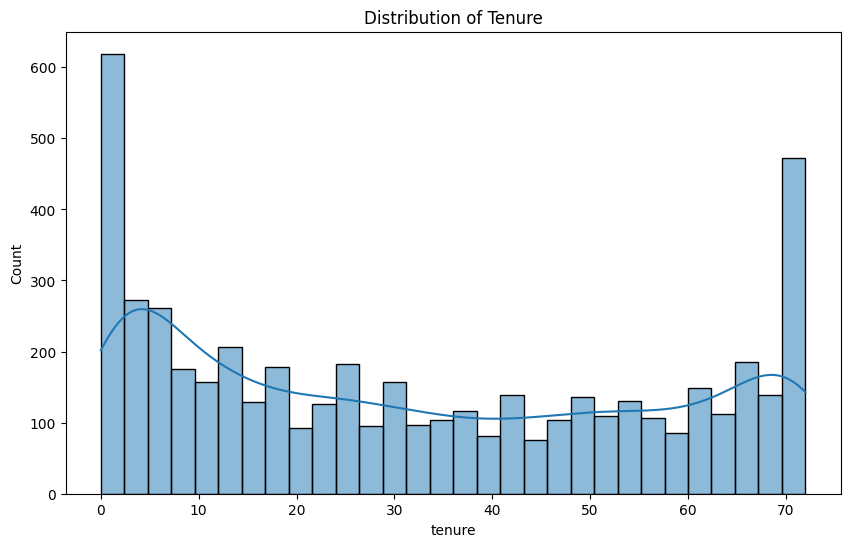

In [48]:
# Univariate Analysis

# Histogram of tenure
plt.figure(figsize=(10, 6))
sn.histplot(combined_data['tenure'], bins=30, kde=True)
plt.title('Distribution of Tenure')
plt.show()

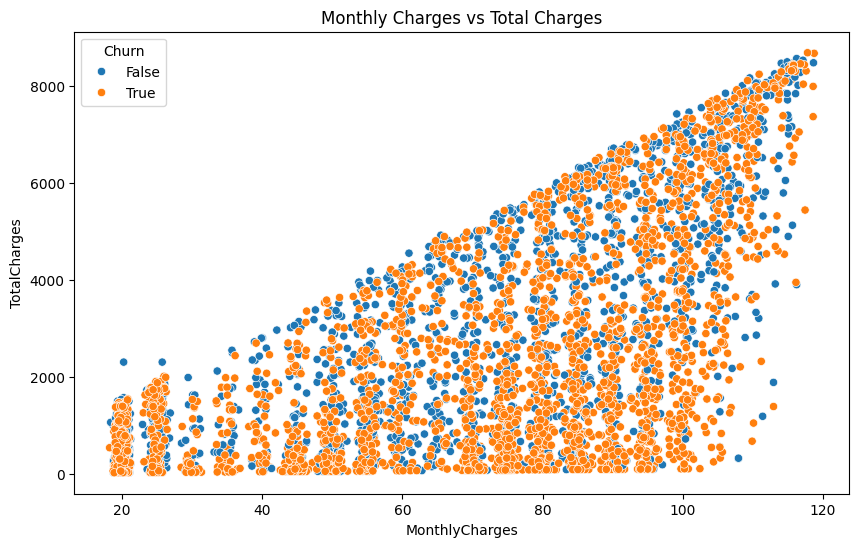

In [50]:
# Bi-variate Analysis

# Relationship between MonthlyCharges and TotalCharges
plt.figure(figsize=(10, 6))
sn.scatterplot(x='MonthlyCharges', y='TotalCharges', data=combined_data, hue='Churn')
plt.title('Monthly Charges vs Total Charges')
plt.show()

**Answer Analytical questions**
>
> 1. Does the monthly and total charges affect the probability of a customer churning?

In [52]:
# Descriptive statistics
monthly_churned = combined_data.loc[combined_data['Churn'], 'MonthlyCharges']
monthly_non_churned = combined_data.loc[~combined_data['Churn'], 'MonthlyCharges']

total_churned = combined_data.loc[combined_data['Churn'], 'TotalCharges']
total_non_churned = combined_data.loc[~combined_data['Churn'], 'TotalCharges']


# Combining the subsets into a DataFrame
monthly_descriptive_stats = pd.DataFrame({
    'Churned': monthly_churned.describe().round(2),
    'Non-Churned': monthly_non_churned.describe().round(2)
})

total_descriptive_stats = pd.DataFrame({
    'Churned': total_churned.describe().round(2),
    'Non-Churned': total_non_churned.describe().round(2)
})

# Display the descriptive statistics
print("Monthly Charges:")
print(monthly_descriptive_stats.T)

print("\nTotal Charges:")
total_descriptive_stats.T

Monthly Charges:
              count   mean    std    min    25%   50%   75%     max
Churned      2777.0  67.40  29.06  18.25  45.05  74.4  90.7  118.75
Non-Churned  2219.0  61.54  31.12  18.40  25.10  64.8  88.6  118.65

Total Charges:


,count,mean,std,min,25%,50%,75%,max
Churned,2777.0,2045.45,2183.17,18.9,272.00,1193.55,3201.55,8684.80
Non-Churned,2219.0,2560.17,2336.10,18.8,581.77,1664.30,4327.15,8564.75


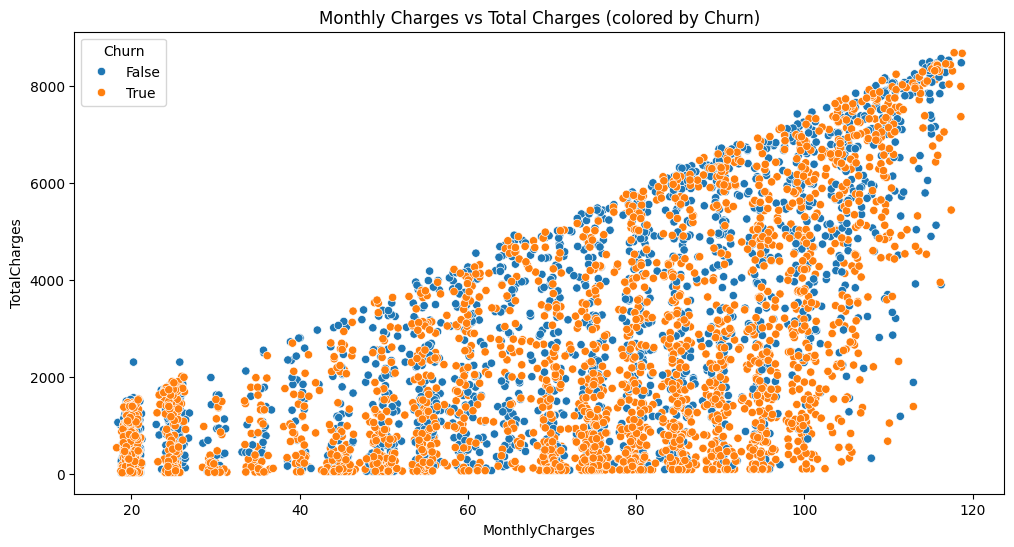

In [54]:
# Visualize the relationship
plt.figure(figsize=(12, 6))
sn.scatterplot(x='MonthlyCharges', y='TotalCharges', data=combined_data, hue='Churn')
plt.title('Monthly Charges vs Total Charges (colored by Churn)')
plt.show()

**Insights**
- The average Monthly Charge for churned customers is slightly higher than that for non-churned customers.
- The average Total Charge for non-churned customers is higher than that for churned customers.
- The spread of Monthly Charges and Total Charges is wider for churned customers, as per higher standard deviations.

> 2. How does contract duration affect the probability of a customer churning?

In [55]:
# Descriptive statistics
contract_churned = combined_data.loc[combined_data['Churn'], 'Contract']
contract_non_churned = combined_data.loc[~combined_data['Churn'], 'Contract']

# Combine the subsets into a DataFrame 
contract_descriptive_stats = pd.DataFrame({
    'Churned': contract_churned.describe(),
    'Non-Churned': contract_non_churned.describe()
})

# Display the descriptive statistics
contract_descriptive_stats

,Churned,Non-Churned
count,2777,2219
unique,3,3
top,Month-to-month,Month-to-month
freq,1832,940


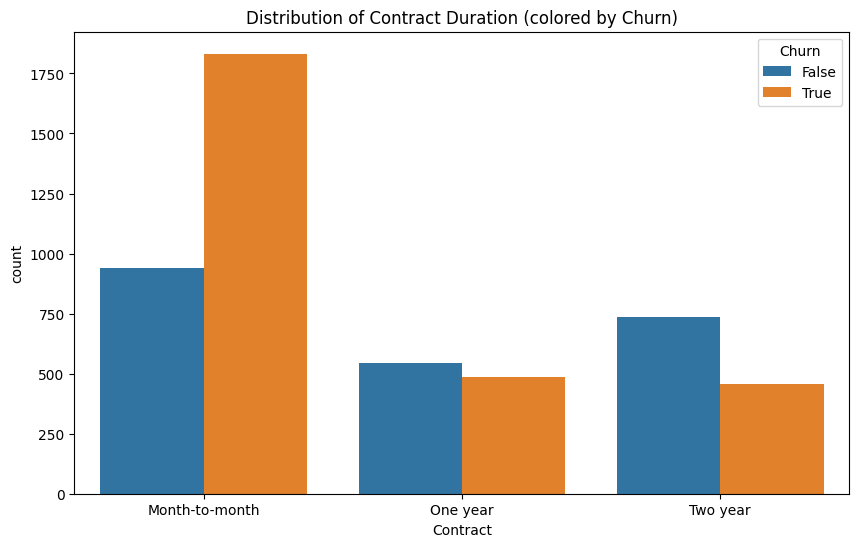

In [57]:
# Visualize the relationship between Contract and Churn
plt.figure(figsize=(10, 6))
sn.countplot(x='Contract', hue='Churn', data=combined_data)
plt.title('Distribution of Contract Duration (colored by Churn)')
plt.show()

**Insight**
> Month-to-Month Contracts Churned: Approximately 1800 customers Non-Churned: Approximately 900 customers
>
> One-Year Contracts Churned: Approximately 500 customers Non-Churned: Approximately 550 customers
>
> Two-Year Contracts Churned: Approximately 500 customers Non-Churned: Approximately 750 customers
>
> - From the graph and descriptive statistics it shows that a significant number of customers for both churned and non-churned, have a "Month-to-month" contract. This implies that Majority of the customers prefer short time commitments.
> 
> - The higher number of churned customers have month-to-month contracts suggests that customers with shorter-term commitments are more likely to churn.
>
> - The relatively lower churn rates for one-year and two-year contracts indicate that longer-term contracts might contribute to customer retention.

> 3. How likely are customers with a tenure of more than 5 years likely to churn?

In [59]:
#Customers with tenure more than 5 years.
long_term_customers = combined_data[combined_data['tenure'] > 5]

#Calculate Churn Rate
churn_rate_long_term = long_term_customers['Churn'].value_counts(normalize=True) * 100
churn_rate_long_term

Churn
True     51.696607
False    48.303393
Name: proportion, dtype: float64

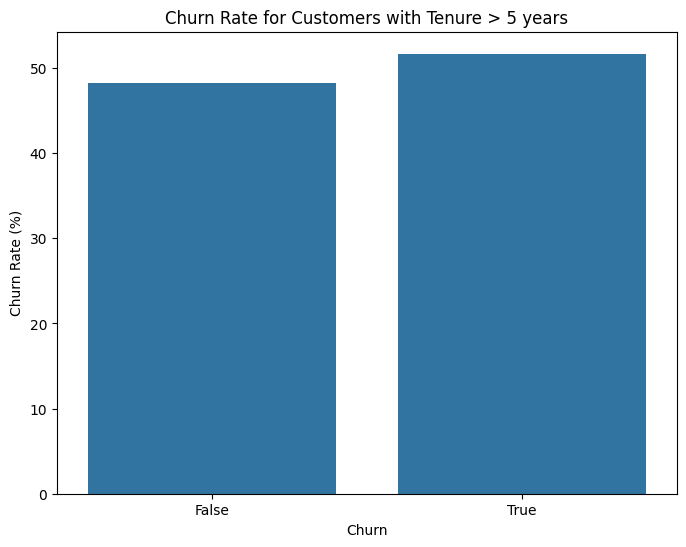

In [61]:
# Visualizing the churn rate for long-term customers
plt.figure(figsize=(8, 6))
sn.barplot(x=churn_rate_long_term.index, y=churn_rate_long_term.values)
plt.title('Churn Rate for Customers with Tenure > 5 years')
plt.xlabel('Churn')
plt.ylabel('Churn Rate (%)')
plt.show()

**Insights**
> - The churn proportion indicates that approximately 51.7% of customers have churned (True), while 48.3% have not (False)
> - It suggests that relatively balanced distribution between churned and non-churned customers in the dataset.
> - The churn rate of approximately 51.7% suggests that more than half of the customers in the dataset have experienced churn. This can create an opportunity to the company for improvement

> 4. Which payment method has the customers with the highest churn rate?

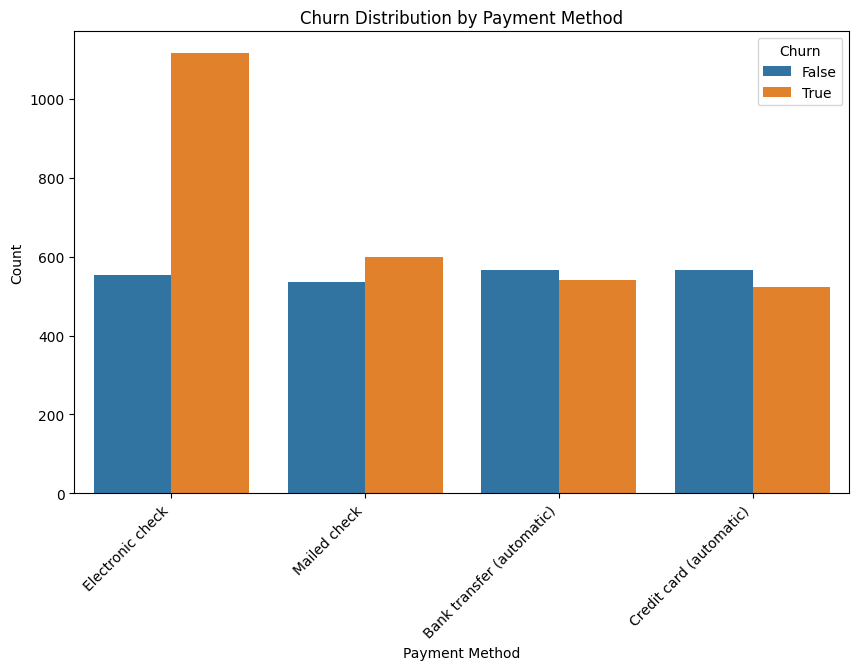

In [63]:
plt.figure(figsize=(10, 6))
sn.countplot(data= combined_data, x='PaymentMethod', hue='Churn') # Count plot of PaymentMethod with hue='Churn'
plt.title('Churn Distribution by Payment Method')
plt.xlabel('Payment Method')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()

**Insights**
> - The payment method with the highest churn rate is Electronic Check with a churn rate of 390 Customers.
> - At the same time it has the highest number of customers who have not churned approximately 310 Customers compared to ther payments.
> - Customers using Electronic Check as their payment method are more likely to churn compared to other payment methods.